### 1. Dataset Description  <a id='columns'>

In this hackathon, you will be predicting the costs of used cars given the data collected from various sources and distributed across various locations in India.

Let’s see if your data science skills can help you predict the price of a used car based on a given set of features discussed below.

Size of training set: 6,019 records

Size of test set: 1,234 records

FEATURES:

Name: The brand and model of the car.

Location: The location in which the car is being sold or is available for purchase.

Year: The year or edition of the model.

Kilometers_Driven: The total kilometres driven in the car by the previous owner(s) in KM.

Fuel_Type: The type of fuel used by the car.

Transmission: The type of transmission used by the car.

Owner_Type: Whether the ownership is Firsthand, Second hand or other.

Mileage: The standard mileage offered by the car company in kmpl or km/kg

Engine: The displacement volume of the engine in cc.

Power: The maximum power of the engine in bhp.

Seats: The number of seats in the car.

New_Price: The price of a new car of the same model.

Price: The price of the used car in INR Lakhs.

In [1]:
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
import matplotlib
%matplotlib inline
import seaborn as sns
import pandas_profiling
matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=20)
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import f1_score, log_loss
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process.kernels import RBF
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost.sklearn import XGBClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import KFold
from sklearn import metrics
from sklearn.feature_selection import SelectKBest 
from sklearn.feature_selection import chi2
import collections
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from collections import Counter


C:\Users\sandeep.rathod\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas_profiling\plot.py:15: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "C:\Users\sandeep.rathod\AppData\Local\Continuum\anaconda3\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "C:\Users\sandeep.rathod\AppData\Local\Continuum\anaconda3\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "C:\Users\sandeep.rathod\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\sandeep.rathod\AppData\Local\Continuum\anaconda3\lib\site-packages\traitlets\config\application.py", line 658, in launch_

In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_mode_interactivity = "all"

In [3]:
x1=pd.ExcelFile(r'Data_Train.xlsx')
x2=pd.ExcelFile(r'Data_Test.xlsx')

In [4]:
x1.sheet_names

['Sheet1']

### create a list of six columns

1. Name
2. Location
3. Year
4. Kilometers_Driven
5. Fuel_Type
6. Transmission
7. Owner_Type
8. Mileage
9. Engine
10. Power
11. Seats
12. New_Price
13. Price

In [5]:
# Define the columns to be read

In [6]:
columns_read=['Name','Location','Year','Kilometers_Driven','Fuel_Type','Transmission','Owner_Type','Mileage','Engine','Power'
             ,'Seats','New_Price','Price']
columns_readt=['Name','Location','Year','Kilometers_Driven','Fuel_Type','Transmission','Owner_Type','Mileage','Engine','Power'
             ,'Seats','New_Price']

### parse the data and read the six columns present in  sheet of data and skip first six rows and set skipfooter=14 and the column names as the list defined above

In [7]:
ds_input = x1.parse(u'Sheet1',names=columns_read)
ds_input.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [8]:
dst_input = x2.parse(u'Sheet1',names=columns_readt)
dst_input.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price
0,Maruti Alto K10 LXI CNG,Delhi,2014,40929,CNG,Manual,First,32.26 km/kg,998 CC,58.2 bhp,4.0,NaN
1,Maruti Alto 800 2016-2019 LXI,Coimbatore,2013,54493,Petrol,Manual,Second,24.7 kmpl,796 CC,47.3 bhp,5.0,NaN
2,Toyota Innova Crysta Touring Sport 2.4 MT,Mumbai,2017,34000,Diesel,Manual,First,13.68 kmpl,2393 CC,147.8 bhp,7.0,25.27 Lakh
3,Toyota Etios Liva GD,Hyderabad,2012,139000,Diesel,Manual,First,23.59 kmpl,1364 CC,null bhp,5.0,NaN
4,Hyundai i20 Magna,Mumbai,2014,29000,Petrol,Manual,First,18.5 kmpl,1197 CC,82.85 bhp,5.0,NaN


In [9]:
#report = pandas_profiling.ProfileReport(ds_input)
#covert profile report as html file
#report.to_file("ds_input.html")

In [10]:
 ds_input.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 13 columns):
Name                 6019 non-null object
Location             6019 non-null object
Year                 6019 non-null int64
Kilometers_Driven    6019 non-null int64
Fuel_Type            6019 non-null object
Transmission         6019 non-null object
Owner_Type           6019 non-null object
Mileage              6017 non-null object
Engine               5983 non-null object
Power                5983 non-null object
Seats                5977 non-null float64
New_Price            824 non-null object
Price                6019 non-null float64
dtypes: float64(2), int64(2), object(9)
memory usage: 611.4+ KB


In [11]:
dst_input.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1234 entries, 0 to 1233
Data columns (total 12 columns):
Name                 1234 non-null object
Location             1234 non-null object
Year                 1234 non-null int64
Kilometers_Driven    1234 non-null int64
Fuel_Type            1234 non-null object
Transmission         1234 non-null object
Owner_Type           1234 non-null object
Mileage              1234 non-null object
Engine               1224 non-null object
Power                1224 non-null object
Seats                1223 non-null float64
New_Price            182 non-null object
dtypes: float64(1), int64(2), object(9)
memory usage: 115.8+ KB


In [12]:
#check duplicates
ds_input =ds_input.drop_duplicates()
ds_input.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6019 entries, 0 to 6018
Data columns (total 13 columns):
Name                 6019 non-null object
Location             6019 non-null object
Year                 6019 non-null int64
Kilometers_Driven    6019 non-null int64
Fuel_Type            6019 non-null object
Transmission         6019 non-null object
Owner_Type           6019 non-null object
Mileage              6017 non-null object
Engine               5983 non-null object
Power                5983 non-null object
Seats                5977 non-null float64
New_Price            824 non-null object
Price                6019 non-null float64
dtypes: float64(2), int64(2), object(9)
memory usage: 658.3+ KB


In [13]:
#combining the train and test 
y_train = ds_input['Price']
train_nomissing = ds_input.drop('Price',axis=1)
test_nomissing = dst_input
combined_set = pd.concat([train_nomissing, test_nomissing], axis = 0) # Stacks them vertically

In [14]:
 combined_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7253 entries, 0 to 1233
Data columns (total 12 columns):
Name                 7253 non-null object
Location             7253 non-null object
Year                 7253 non-null int64
Kilometers_Driven    7253 non-null int64
Fuel_Type            7253 non-null object
Transmission         7253 non-null object
Owner_Type           7253 non-null object
Mileage              7251 non-null object
Engine               7207 non-null object
Power                7207 non-null object
Seats                7200 non-null float64
New_Price            1006 non-null object
dtypes: float64(1), int64(2), object(9)
memory usage: 736.6+ KB


#dropping  null places row.
ds_input.drop(ds_input[ds_input['Place'].isnull()].index.tolist(),inplace=True)
dst_input.drop(dst_input[dst_input['Place'].isnull()].index.tolist(),inplace=True)

In [15]:
combined_set["Power"] = combined_set["Power"].str.replace('null bhp','0 bhp')
combined_set["Power"].fillna('0 bhp',inplace=True)

combined_set["Mileage"].fillna('0.0 kmpl',inplace=True)


#Seats
combined_set["Engine"].fillna('0 CC',inplace=True)

combined_set["Seats"].fillna(0,inplace=True)


In [16]:
#spliting mileage
ds_mil = combined_set["Mileage"].str.split(" ",n=1,expand=True)
ds_mil1 = ds_mil[0].str.split(".",n=1,expand=True)
combined_set["Mileage"]=ds_mil1[0].astype(str).astype(int)
#combined_set["Mileage"]=combined_set["Mileage"].str.replace('0','')

In [17]:
ds_eng = combined_set["Engine"].str.split(" ",n=1,expand=True)
combined_set["Engine"]=ds_eng[0].astype(str).astype(int)
#combined_set["Engine"]=combined_set["Engine"].str.replace('0','')

In [18]:
ds_pwr = combined_set["Power"].str.split(" ",n=1,expand=True)
ds_pwr1 = ds_pwr[0].str.split(".",n=1,expand=True)

combined_set["Power"]=ds_pwr1[0].astype(str).astype(int)
#combined_set["Power"]=combined_set["Power"].str.replace('0','')

In [19]:
combined_set["New_Price"]= combined_set["New_Price"].replace(np.nan,'0 Lakh')

In [20]:
ds_prc = combined_set["New_Price"].str.split(" ",n=1,expand=True)

In [21]:
combined_set["cur"]=ds_prc[1].astype(str)

In [22]:
ds_prc1 = ds_prc[0].str.split(".",n=1,expand=True)

combined_set["New_Price"]=ds_prc1[0].astype(str).astype(int)

In [23]:
def cal_cur(val_cur):
    val,cur = val_cur
    if cur=='Cr':
        val = val*100
    return val

combined_set["New_Price"] = combined_set[["New_Price",'cur']].apply(cal_cur, axis=1)

In [24]:
combined_set["Name2"]=combined_set["Name"].apply(lambda x:' '.join(x.split()[:2]))

In [25]:
combined_set["Name1"]=combined_set["Name"].apply(lambda x:' '.join(x.split()[:1]))

In [26]:
combined_set['Name2'] = combined_set['Name2'].apply(lambda x: " ".join(x.lower() for x in x.split()))
combined_set['Name'] = combined_set['Name'].apply(lambda x: " ".join(x.lower() for x in x.split()))
combined_set['Name1'] = combined_set['Name1'].apply(lambda x: " ".join(x.lower() for x in x.split()))


In [27]:
combined_set.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,cur,Name2,Name1
0,maruti wagon r lxi cng,Mumbai,2010,72000,CNG,Manual,First,26,998,58,5.0,0,Lakh,maruti wagon,maruti
1,hyundai creta 1.6 crdi sx option,Pune,2015,41000,Diesel,Manual,First,19,1582,126,5.0,0,Lakh,hyundai creta,hyundai
2,honda jazz v,Chennai,2011,46000,Petrol,Manual,First,18,1199,88,5.0,8,Lakh,honda jazz,honda
3,maruti ertiga vdi,Chennai,2012,87000,Diesel,Manual,First,20,1248,88,7.0,0,Lakh,maruti ertiga,maruti
4,audi a4 new 2.0 tdi multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15,1968,140,5.0,0,Lakh,audi a4,audi


In [28]:
combined_set["Power"].replace(0,np.nan,inplace=True)
combined_set["Mileage"].replace(0,np.nan,inplace=True)
combined_set["Engine"].replace(0,np.nan,inplace=True)
combined_set["Seats"].replace(0,np.nan,inplace=True)
combined_set["New_Price"].replace(0,np.nan,inplace=True)

In [29]:
by_Name=combined_set.groupby(['Name'])
by_Name2=combined_set.groupby(['Name2'])

In [30]:
by_Name1=combined_set.groupby(['Name1'])

In [31]:
def impute_median(series):
    return series.fillna(series.median())

In [32]:
combined_set["Power"]=by_Name['Power'].transform(impute_median)
combined_set["Mileage"]=by_Name['Mileage'].transform(impute_median)
combined_set["Engine"]=by_Name['Engine'].transform(impute_median)
combined_set["Seats"]=by_Name['Seats'].transform(impute_median)
combined_set["New_Price"]=by_Name['New_Price'].transform(impute_median)

In [33]:
combined_set["Power"]=by_Name2['Power'].transform(impute_median)
combined_set["Mileage"]=by_Name2['Mileage'].transform(impute_median)
combined_set["Engine"]=by_Name2['Engine'].transform(impute_median)
combined_set["Seats"]=by_Name2['Seats'].transform(impute_median)
combined_set["New_Price"]=by_Name2['New_Price'].transform(impute_median)

In [34]:
combined_set["Power"]=by_Name1['Power'].transform(impute_median)
combined_set["Mileage"]=by_Name1['Mileage'].transform(impute_median)
combined_set["Engine"]=by_Name1['Engine'].transform(impute_median)
combined_set["Seats"]=by_Name1['Seats'].transform(impute_median)
#combined_set["New_Price"]=by_Name1['New_Price'].transform(impute_median)

In [35]:
combined_set['Mileage'].fillna(0,inplace= True)
combined_set['Power'].fillna(0,inplace= True)
combined_set['New_Price'].fillna(0,inplace= True)

In [36]:
dummy1_combined_set=combined_set

In [37]:
#combined_set = dummy1_combined_set

### Data exploration

In [38]:
df_train =  pd.concat([combined_set[:train_nomissing.shape[0]],y_train], axis=1) # Up to the last initial training set row
dst_input = combined_set[train_nomissing.shape[0]:]

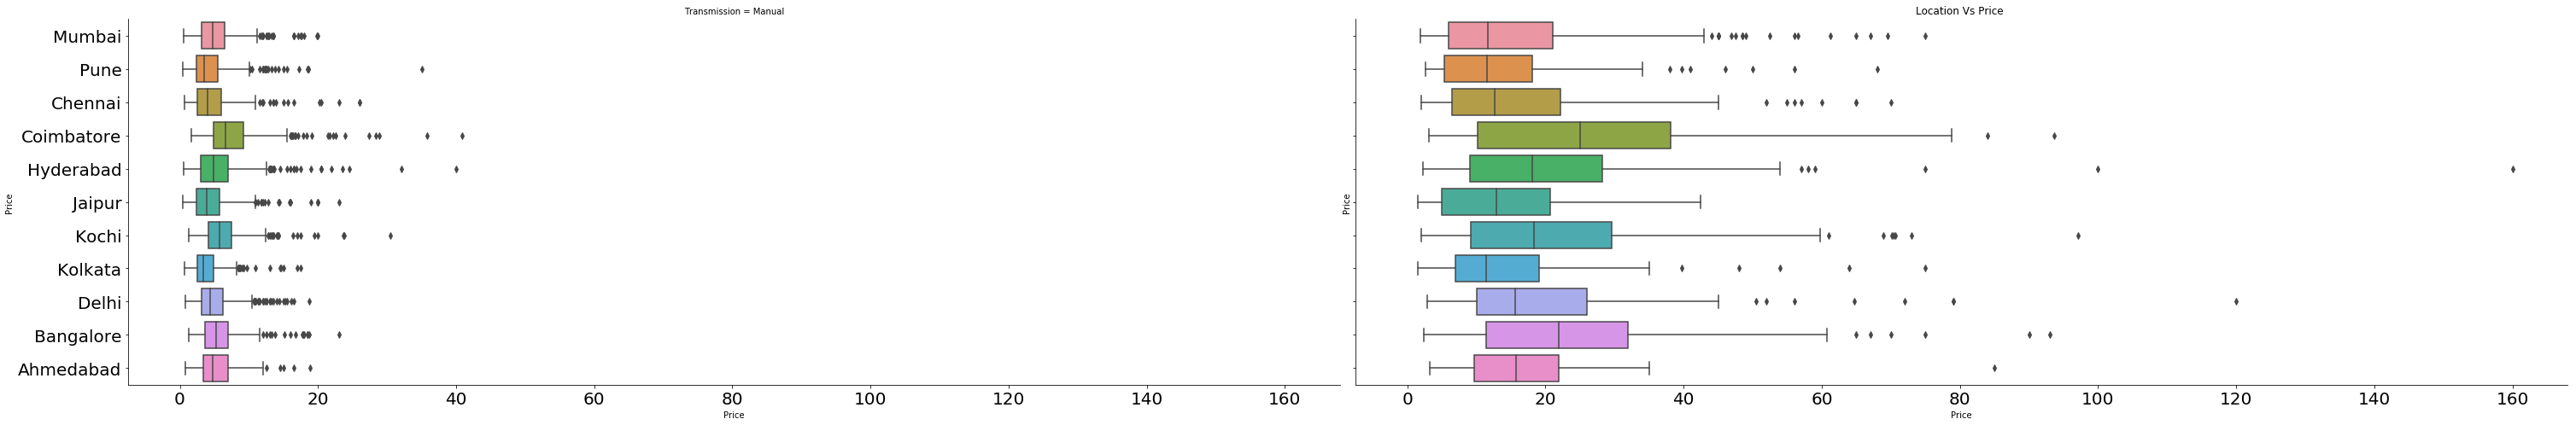

In [39]:
mx = sns.factorplot(y="Location",x="Price", data=df_train, kind="box",col='Transmission', size=7,aspect=3)
mx.set(ylabel='Price ')
plt.title('Location Vs Price ');
plt.show()

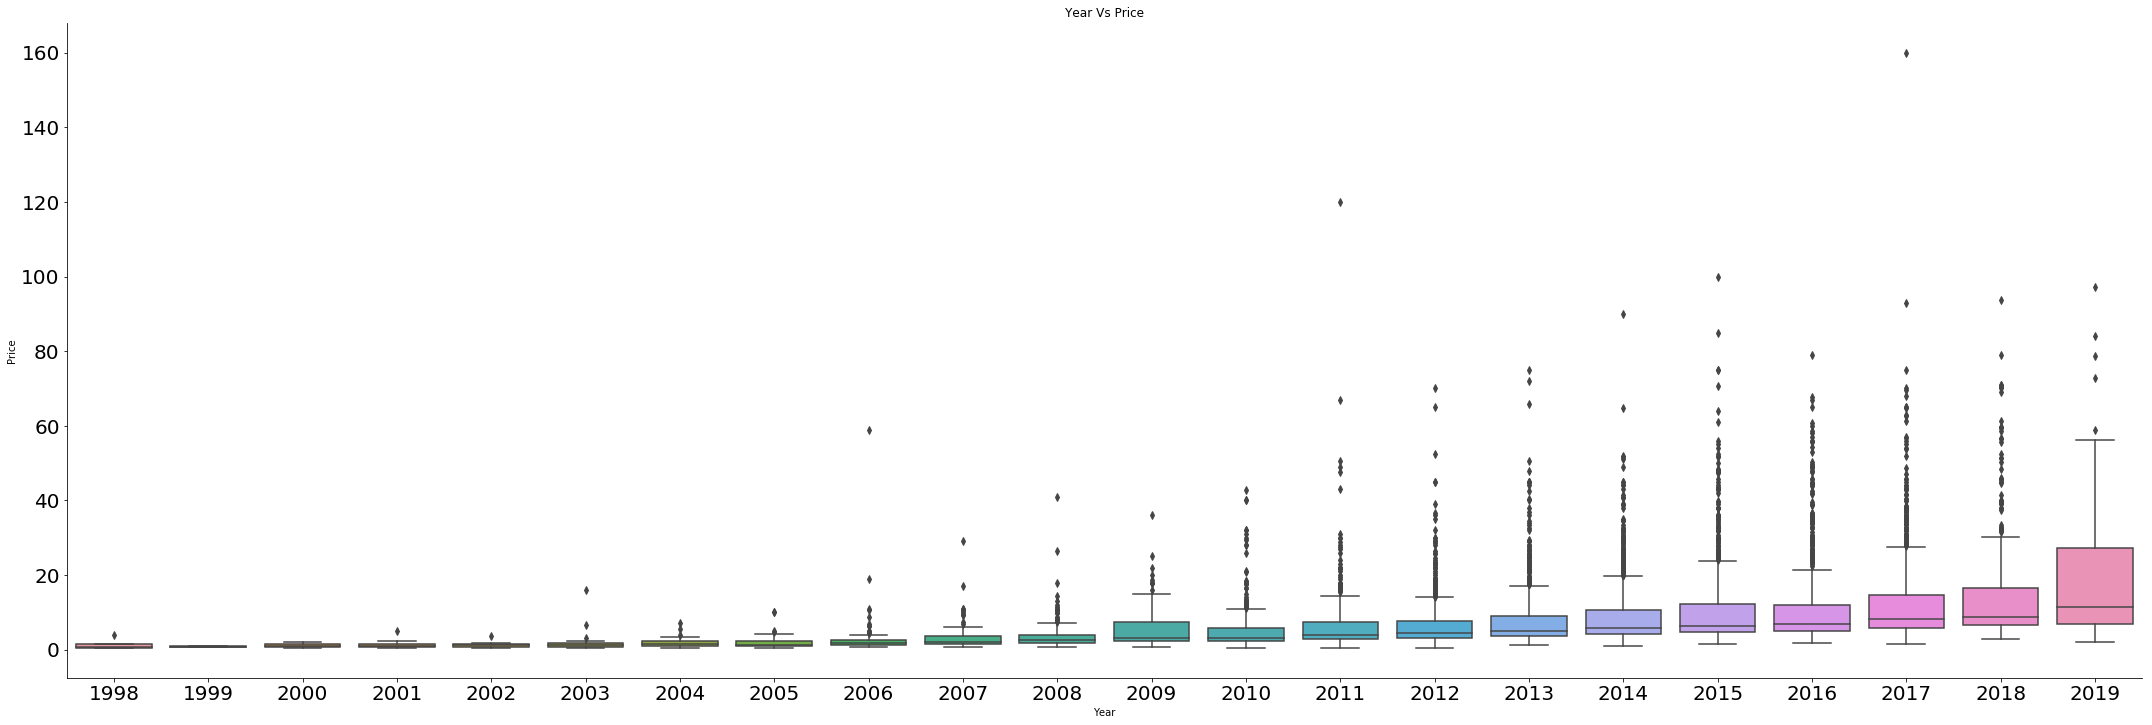

In [40]:
mx = sns.factorplot(x="Year", y="Price", data=df_train, kind="box", size=10 ,aspect=3)
mx.set(xlabel= 'Year')
#mx.set_xticklabels('Year',rotation=45)
mx.set(ylabel= 'Price')
plt.title('Year Vs Price');
plt.show()

<Figure size 1800x1080 with 0 Axes>

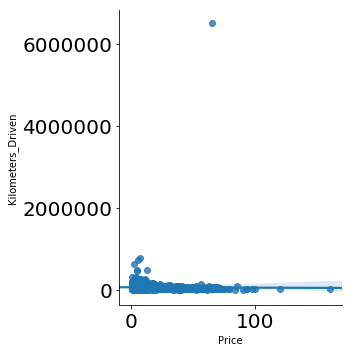

In [41]:
plt.figure(figsize=(25,15))
sns.lmplot(y='Kilometers_Driven',x='Price',data=df_train,fit_reg=True);

<Figure size 1800x1080 with 0 Axes>

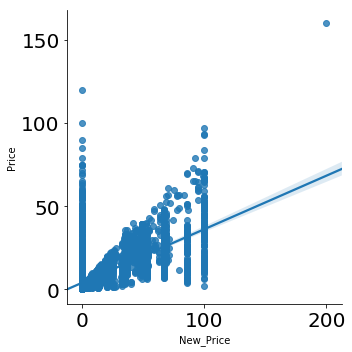

In [42]:
plt.figure(figsize=(25,15))
sns.lmplot(x='New_Price',y='Price',data=df_train,fit_reg=True);

In [43]:
df_train.loc[(df_train['Price']>150) ]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,cur,Name2,Name1,Price
4079,land rover range rover 3.0 diesel lwb vogue,Hyderabad,2017,25000,Diesel,Automatic,First,13.0,2993.0,255.0,5.0,200.0,Cr,land rover,land,160.0


In [44]:
#df_train =df_train.drop(df_train.loc[(df_train['Price']>150)].index.tolist()).reset_index(drop=True)


In [45]:
df_train.loc[ (df_train['Kilometers_Driven']>6000000) ]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,cur,Name2,Name1,Price
2328,bmw x5 xdrive 30d m sport,Chennai,2017,6500000,Diesel,Automatic,First,15.0,2993.0,258.0,5.0,0.0,Lakh,bmw x5,bmw,65.0


In [46]:
df_train['Kilometers_Driven'] =df_train['Kilometers_Driven'].apply(lambda x: 650000 if x>6000000 else x)

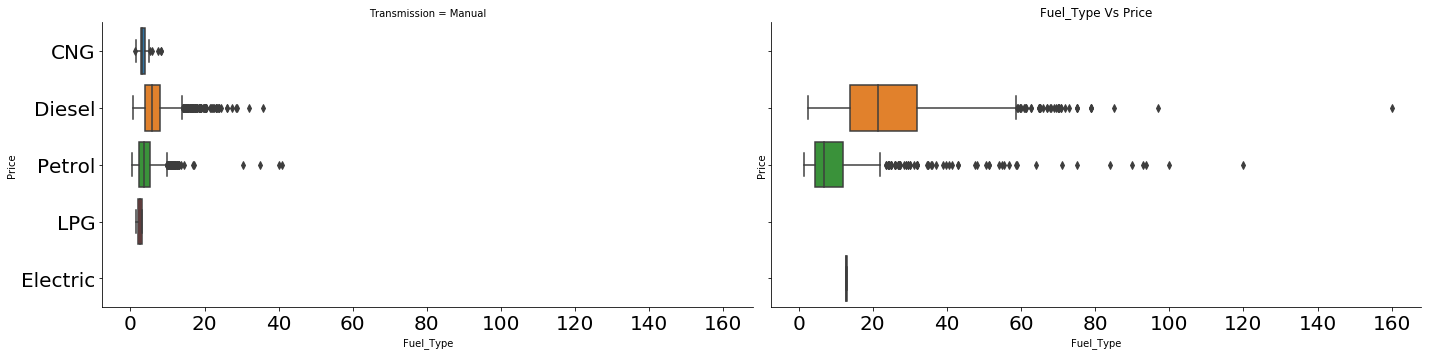

In [47]:
mx = sns.factorplot(y="Fuel_Type", x="Price", data=df_train, col='Transmission',kind="box", size=5 ,aspect=2)
mx.set(xlabel='Fuel_Type')
mx.set(ylabel= 'Price')
plt.title('Fuel_Type Vs Price');
plt.show()

In [48]:
df_train =df_train.drop(df_train.loc[(df_train['Fuel_Type']=='Electric') ].index.tolist()).reset_index(drop=True) 

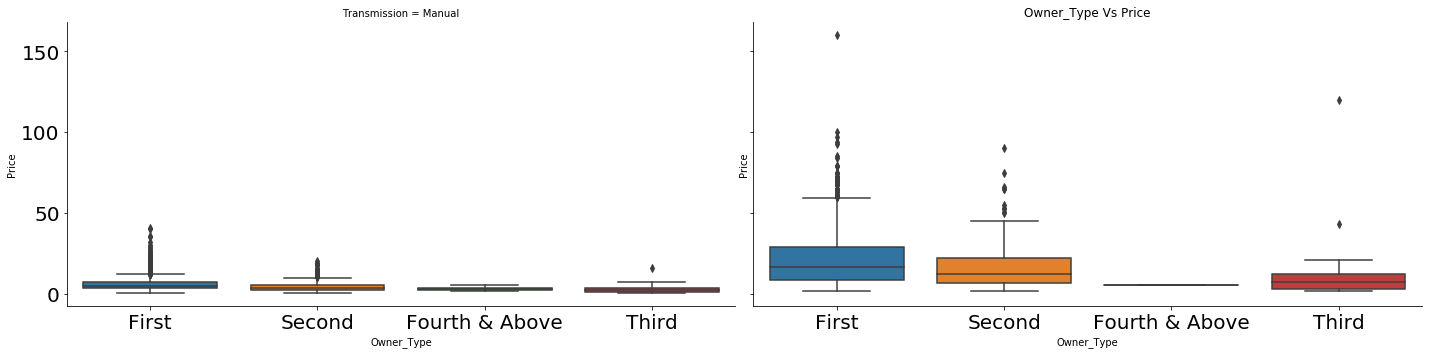

In [49]:
mx = sns.factorplot(x="Owner_Type", y="Price", data=df_train, kind="box",col='Transmission', size=5 ,aspect=2)
mx.set(xlabel='Owner_Type')
mx.set(ylabel= 'Price')
plt.title('Owner_Type Vs Price');
plt.show()

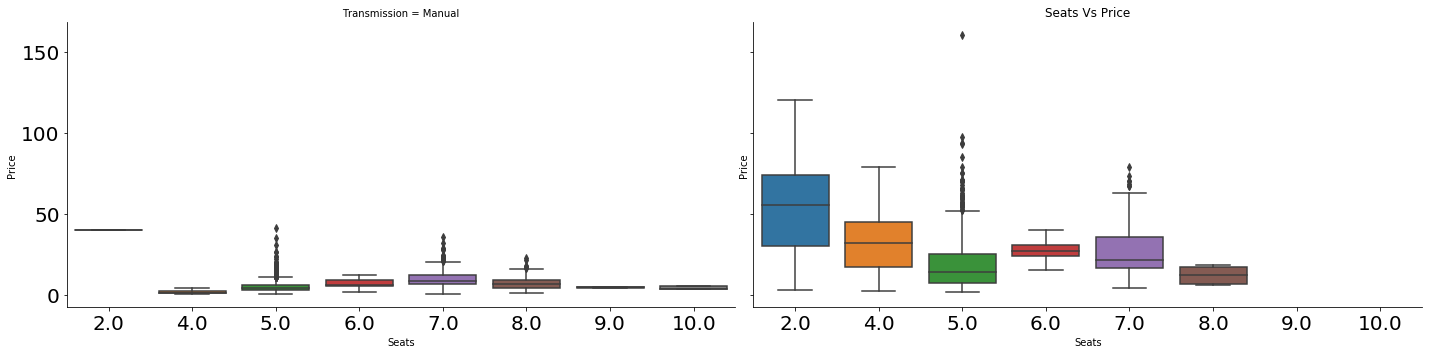

In [50]:
mx = sns.factorplot(x="Seats", y="Price", data=df_train, kind="box",col='Transmission', size=5 ,aspect=2)
mx.set(xlabel='Seats')
mx.set(ylabel= 'Price')
plt.title('Seats Vs Price');
plt.show()

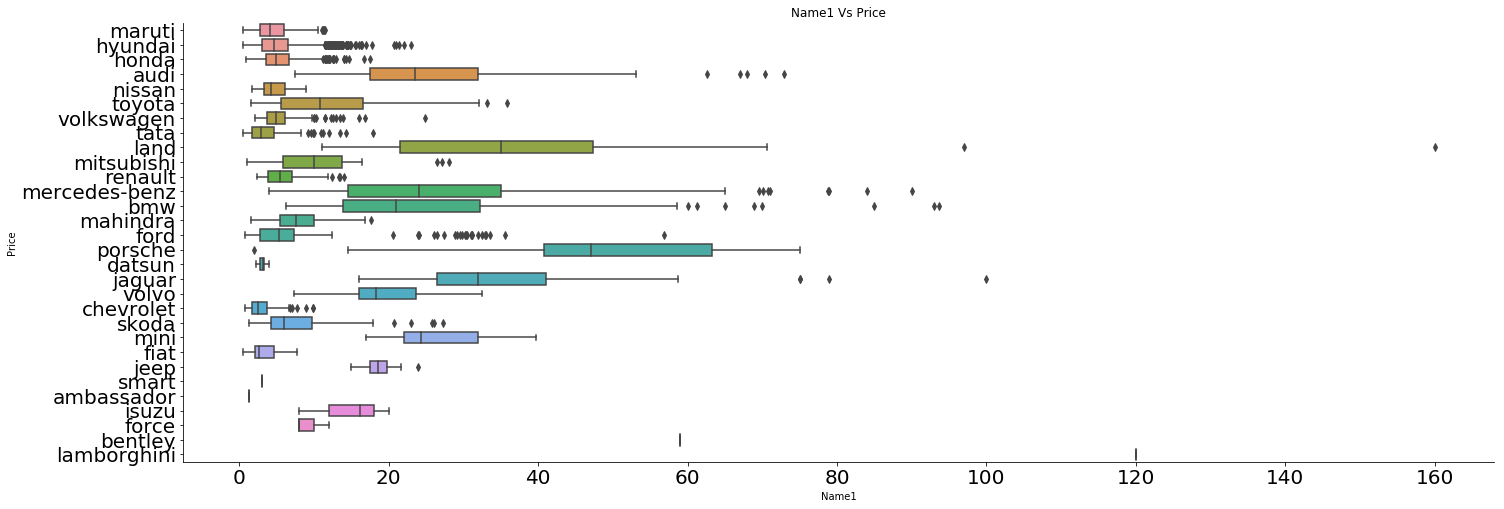

In [51]:
mx = sns.factorplot(y="Name1", x="Price", data=df_train,kind="box",size=7 ,aspect=3)
mx.set(xlabel='Name1')
mx.set(ylabel= 'Price')
plt.title('Name1 Vs Price');
plt.show()

In [52]:
df_train.loc[ (df_train['Name1']=='porsche') & (df_train['Price']<3) ]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,cur,Name2,Name1,Price
3132,porsche cayenne base,Kochi,2019,14298,Petrol,Automatic,First,13.0,2995.0,340.0,5.0,100.0,Cr,porsche cayenne,porsche,2.02


In [53]:
df_train =df_train.drop(df_train.loc[(df_train['Name1']=='porsche') & (df_train['Price']<3)].index.tolist()).reset_index(drop=True)


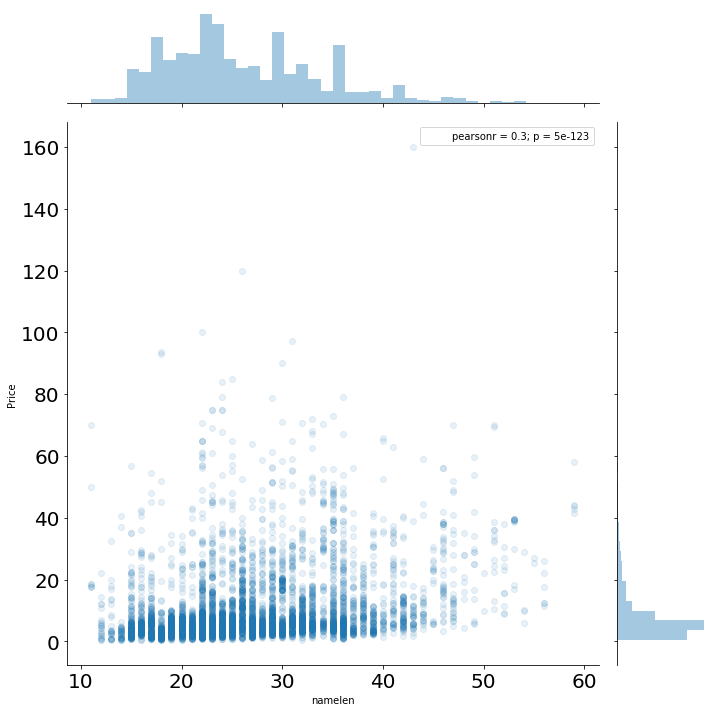

In [54]:
# Adding the name length to see how much does a long description influence the price
df_train['namelen'] = [min(70, len(n)) for n in df_train['Name']]
dst_input['namelen'] = [min(70, len(n)) for n in dst_input['Name']]
ax = sns.jointplot(x='namelen', 
                   y='Price',
                   data=df_train[['namelen','Price']], 
                    alpha=0.1, 
                    size=10)

In [55]:
price_df_train = pd.DataFrame(df_train)

In [56]:
price_df_train.to_excel('price_df_train.xlsx')

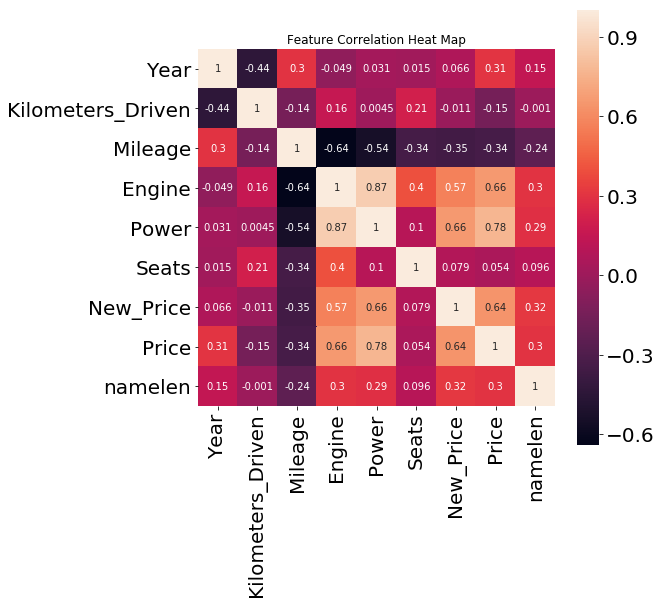

In [57]:
plt.figure(figsize =(8,8))
plt.title('Feature Correlation Heat Map')
sns.heatmap(df_train.corr(),linewidths=.1,vmax=1.0,
            square=True,linecolor='',annot=True)

In [58]:
combined_set.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,cur,Name2,Name1
0,maruti wagon r lxi cng,Mumbai,2010,72000,CNG,Manual,First,26.0,998.0,58.0,5.0,5.0,Lakh,maruti wagon,maruti
1,hyundai creta 1.6 crdi sx option,Pune,2015,41000,Diesel,Manual,First,19.0,1582.0,126.0,5.0,15.5,Lakh,hyundai creta,hyundai
2,honda jazz v,Chennai,2011,46000,Petrol,Manual,First,18.0,1199.0,88.0,5.0,8.0,Lakh,honda jazz,honda
3,maruti ertiga vdi,Chennai,2012,87000,Diesel,Manual,First,20.0,1248.0,88.0,7.0,11.0,Lakh,maruti ertiga,maruti
4,audi a4 new 2.0 tdi multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.0,1968.0,140.0,5.0,53.0,Lakh,audi a4,audi


In [59]:
#combining the train and test 
y_train = df_train['Price']
train_nomissing = df_train.drop('Price',axis=1)
test_nomissing = dst_input
combined_set = pd.concat([train_nomissing, test_nomissing], axis = 0) # Stacks them vertically

### 4. Feature Engineering  <a id='feature'>

In [60]:
dummy2_combined_set=combined_set

In [61]:
combined_set = dummy2_combined_set

In [62]:
# agegroup below 30 and above 59 as a categorical feature
def premium(pro):
    if(pro in ["maruti","hyundai",'honda','ford','mahindra','tata','skoda','renault'
              ,'chevrolet','nissan','fiat','datsun','ambassador','hindustan'
              ,'Smart']):
        pro='I'
    else:
        pro='P'
    return pro
      
combined_set['is_premium'] = combined_set['Name1'].apply(premium)

In [63]:
# agegroup below 30 and above 59 as a categorical feature
def Exp_output(Ex):
    if Ex<=2006:
        Ex=2006
    return Ex
      
combined_set['Year'] = combined_set['Year'].apply(Exp_output)

In [64]:
# agegroup below 30 and above 59 as a categorical feature
def Exp_output(Ex):
    if (Ex in ['CNG','LPG']):
        Ex='LPG_CNG'
    return Ex
      
combined_set['Fuel_Type'] = combined_set['Fuel_Type'].apply(Exp_output)

In [65]:
# agegroup below 30 and above 59 as a categorical feature
def Exp_owner(Ex_Tr):
    Ex,Tr=Ex_Tr
    if ((Tr =='Manual' and Ex in ['Second','Third']) or (Ex=='Fourth & Above')):
        Ex='com'
    return Ex
      
combined_set['Owner_Type'] = combined_set[['Owner_Type','Transmission']].apply(Exp_owner,axis=1)

In [66]:
# agegroup below 30 and above 59 as a categorical feature
def Exp_price(Ex_pr):
    Ex,pr=Ex_pr
    if Ex in ['mercedes-benz s','jaguar f'] :
        pr=200
    elif Ex in ['audi a8','mercedes-benz sl-class']:
        pr=100
    elif Ex in ['mercedes-benz gl-class','bmw x6','jaguar xj','mercedes-benz slk-class','volvo xc90','audi a7',
               'porsche cayman','toyota land'] :
        pr=90
    elif Ex in ['bmw x5','bmw 6','mitsubishi montero']:
        pr=70
    elif Ex in ['mercedes-benz m-class','audi tt','bmw z4'] :
        pr=66
    elif Ex in ['audi q5','volvo xc60','mercedes-benz r-class','volvo s80','nissan 370z']:
        pr=55
    elif Ex in ['honda accord']:
        pr=44
    elif Ex in ['hyundai santa','volkswagen passat','renault koleos','nissan x-trail','chevrolet captiva','bmw 1',
               'mitsubishi outlander','fiat abarth']:
        pr=30
    elif Ex in[ 'mahindra ssangyong','skoda yeti','nissan teana','maruti grand','isuzu mu']:
        pr= 24
    elif Ex=='hyundai sonata':
        pr=18
    elif Ex in ['volkswagen jetta','isuzu d-max']:
        pr=17
    elif Ex in['skoda laura','chevrolet cruze','renault fluence']:
        pr=16.5
    elif Ex=='tata new':
        pr=14
    elif Ex in ['mahindra scorpio','renault scala','tata xenon','force one','chevrolet tavera','renault captur']:
        pr=12
    elif Ex in ['ford fiesta','maruti sx4','honda civic','mahindra tuv','chevrolet optra','maruti s',
               'tata sumo','mahindra quanto','toyota qualis','volkswagen crosspolo','renault lodgy','mitsubishi lancer'
               ,'mitsubishi cedia','mahindra jeep']:
        pr=9
    elif Ex in ['hyundai accent','honda mobilio','chevrolet enjoy','renault pulse','fiat grande','mahindra renault',
               'ford classic']:
        pr=7
    elif Ex in ['maruti ritz','tata manza','chevrolet aveo','chevrolet sail','maruti esteem','mahindra logan',
               'ford fusion','opelcorsa 1.4gsi']:
        pr=6
    elif Ex in ['tata indigo','hyundai i10','ford ikon','fiat petra','hindustan motors']:
        pr= 5
    elif Ex in ['hyundai eon','hyundai getz','chevrolet beat','tata venture']:
        pr=4.5
    elif Ex in['tata indica','maruti a-star','maruti estilo','maruti versa','maruti 1000','datsun redi']:
        pr=4
    elif Ex in ['chevrolet spark','maruti zen']:
        pr=3.5
    elif Ex in ['maruti omni','maruti 800']:
        pr=3
    elif Ex =='tata nano':
        pr=2.5     
    return pr
      
combined_set['New_Price'] = combined_set[['Name2','New_Price']].apply(Exp_price,axis=1)

# Adding new feature for variant

def variant(pro):
    Ex = 1
    if ('vdi' in pro or 'vxi' in pro or 'at' in pro or 'xline' in pro or 'sportline' in pro or 'lt' in pro or 'ltz' in pro
       or 'sport' in pro or 'sportz' in pro or 'sunroof' in pro or 'trent' in pro or 'Technology' in pro
       or 'Technology' in pro or 'Design' in pro or 'expedition' in pro or 'vx' in pro  or 'magna' in pro):
        Ex=2
    elif ('zdi' in pro or 'zxi' in pro or 'exclusive' in pro or 'luxury' in pro or 'plus' in pro or 'roadster' in pro
         or 'limited' in pro or 'Premium' in pro ):
        Ex=3
    return float(Ex)
      
combined_set['variant'] = combined_set['Name'].apply(variant)

In [67]:
combined_set.to_excel('combined_set3.xlsx')

In [68]:
combined_set=combined_set.drop(['Name','Name1','cur'],axis=1)

In [69]:
combined_set=pd.get_dummies(data=combined_set)

In [70]:
st_dummies = pd.get_dummies(combined_set.Seats, prefix='Seats')
combined_set = pd.concat([combined_set,st_dummies], axis=1)



In [71]:
combined_set=combined_set.drop(['Seats'],axis=1)

In [72]:
#combined_set.to_excel('combined_set.xlsx')

### Scaling dataset   <a id='pcalr'>

In [73]:
df_train = combined_set[:train_nomissing.shape[0]] # Up to the last initial training set row
df_test = combined_set[train_nomissing.shape[0]:] # Past the last initial training set row

In [74]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
df_train_arr_scld = sc.fit_transform(df_train)
df_train_scld=pd.DataFrame(df_train_arr_scld,columns=df_train.columns)
df_test_arr_scld = sc.transform(df_test)
df_test_scld=pd.DataFrame(df_test_arr_scld,columns=df_test.columns)

In [75]:
# Spitting the data into Test and Train from combined_set_scld

train = df_train_scld # Up to the last initial training set row
test = df_test_scld # Past the last initial training set row

#train = df_train # Up to the last initial training set row
#test = df_test # Past the last initial training set row
labels = y_train


In [76]:
train.head()

,Year,Kilometers_Driven,Mileage,Engine,Power,New_Price,namelen,Location_Ahmedabad,Location_Bangalore,Location_Chennai,...,is_premium_I,is_premium_P,Seats_2.0,Seats_4.0,Seats_5.0,Seats_6.0,Seats_7.0,Seats_8.0,Seats_9.0,Seats_10.0
0,-1.099422,0.368090,1.937179,-1.036946,-1.009167,-0.652672,-0.523170,-0.196657,-0.251542,-0.298769,...,0.643324,-0.643324,-0.05164,-0.12935,0.436555,-0.07197,-0.355501,-0.150935,-0.022336,-0.028841
1,0.510872,-0.434202,0.266755,-0.063648,0.254823,-0.211941,0.733173,-0.196657,-0.251542,-0.298769,...,0.643324,-0.643324,-0.05164,-0.12935,0.436555,-0.07197,-0.355501,-0.150935,-0.022336,-0.028841
2,-0.777363,-0.304800,0.028123,-0.701958,-0.451524,-0.526749,-1.779514,-0.196657,-0.251542,3.347064,...,0.643324,-0.643324,-0.05164,-0.12935,0.436555,-0.07197,-0.355501,-0.150935,-0.022336,-0.028841
3,-0.455304,0.756296,0.505387,-0.620294,-0.451524,-0.400826,-1.151342,-0.196657,-0.251542,3.347064,...,0.643324,-0.643324,-0.05164,-0.12935,-2.290665,-0.07197,2.812933,-0.150935,-0.022336,-0.028841
4,-0.133245,-0.442742,-0.687772,0.579662,0.515056,1.362099,0.607539,-0.196657,-0.251542,-0.298769,...,-1.554426,1.554426,-0.05164,-0.12935,0.436555,-0.07197,-0.355501,-0.150935,-0.022336,-0.028841


In [77]:
train.shape

(6016, 257)

In [78]:
test.shape

(1234, 257)

In [79]:
# Keep one set of train data for further use
train1=train.copy()
test1=test.copy()
y_train1=y_train.copy()

In [80]:
#train=train1
#test=test1
#y_train=y_train1

### Let's start building models

In [81]:
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb
import lightgbm as lgb
from sklearn.linear_model import SGDRegressor
from sklearn.svm import SVR

# Define a cross validation strategy

In [82]:
#Validation function
n_folds = 5

def rmsle_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(train.values)
    rmse= np.sqrt(-cross_val_score(model, train.values, y_train, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)

In [83]:
def rmsle(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))

# Ensembling LGBM, XGBoost and Gradient

Final Training and Prediction

# Gradient Boosting Regression :
With huber loss that makes it robust to outliers

In [84]:
GBoost = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                   max_depth=4,
                                   min_samples_leaf=15, min_samples_split=15, 
                                   loss='huber', random_state =5)

In [85]:
GBoost.fit(train, y_train)
gb_train_pred = GBoost.predict(train)

In [86]:
gb_pred = (GBoost.predict(test.values))

In [87]:
print(rmsle(y_train, gb_train_pred))

1.7306934682038493


# XGBoost : :

In [88]:
model_xgb = xgb.XGBRegressor(colsample_bytree=0.52, gamma=0.03, 
                             learning_rate=0.072, max_depth=6, 
                             min_child_weight=2, n_estimators=2200,
                             reg_alpha=0, reg_lambda=1,
                             subsample=0.615, silent=1,
                             random_state =7, nthread = -1)

In [89]:
model_xgb.fit(train, y_train)
xgb_train_pred = model_xgb.predict(train)
xgb_pred = model_xgb.predict(test)
print(rmsle(y_train, xgb_train_pred))

0.3112781978405923


In [90]:
price_XG_pred = pd.DataFrame(xgb_pred)

In [91]:
price_XG_pred.to_excel('price_test_reslt_xgb1.xlsx')

# Light GBM : :

In [92]:
model_lgb = lgb.LGBMRegressor(objective='regression',num_leaves=35,
                              learning_rate=0.052, n_estimators=2800,feature_fraction = 0.75,
                              feature_fraction_seed=9,min_data_in_leaf =15
                                                         
                              )

In [93]:
model_lgb.fit(train, y_train)
lgb_train_pred = model_lgb.predict(train)

In [94]:
print(rmsle(y_train, lgb_train_pred))

0.2841241979007227


In [95]:
lgb_pred = model_lgb.predict(test.values)

In [96]:
price_pred_lgb = pd.DataFrame(lgb_pred)

In [97]:
price_pred_lgb.to_excel('price_test_reslt_lgbm.xlsx')

# Ensemble prediction:

In [98]:
ens_train =  xgb_train_pred*0.35 + lgb_train_pred*0.35 + gb_train_pred*0.3

In [99]:
ens_train_pd = pd.DataFrame(ens_train)

In [100]:
ens_train_pd.to_excel('ens_train_pd.xlsx')

In [101]:

'''RMSE on the entire Train data when averaging'''

print('RMSLE score on train data:')
print(rmsle(y_train,xgb_train_pred*0.45 + lgb_train_pred*0.3 + gb_train_pred*0.25 ))

RMSLE score on train data:
0.5579649364702558


In [102]:
# ensemble = stacked_pred*0.4 + xgb_pred*0.3 + gb_pred*0.3-->85

ensemble =  xgb_pred*0.4 + lgb_pred*0.3 + gb_pred*0.3

In [103]:
ensemble

array([ 2.68323106,  3.17106095, 17.50420147, ...,  3.14830948,
        5.10074144, 16.81826322])

In [104]:
price_pred_ensb = pd.DataFrame(ensemble)

In [105]:
price_pred_ensb.to_excel('price_test_reslt_ensb1.xlsx')